<a href="https://colab.research.google.com/github/enriqueasegura/Quantum-X/blob/master/ML_QMLHEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Part

You will explore how best to apply machine learning algorithms, for example, Neural Network, Boosted Decision Tree (BDT), Support Vector Machine(SVM) to solve a High Energy Data analysis issue, more specifically,  separating the signal events from the background events.

A set of input samples (simulated with Delphes) is provided in NumPy NPZ format  [Download Input](https://drive.google.com/open?id=1r_MZB_crfpij6r3SxPDeU_3JD6t6AxAj). In the input file, there are only 100 samples for training and 100 samples for testing so it won’t take much computing resources to accomplish this task. The signal events are labeled with 1 while the background sample are labeled with 0.

You can apply one machine learning algorithm to this input but be sure to show that you understand how to fine tune your machine learning model to improve the performance. The performance can be evaluated with classification accuracy or Area Under ROC Curve (AUC).


##Libraries Needed

In [63]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import pandas as pd
import scipy as sci 

import matplotlib
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.unicode']=True

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

from sklearn.metrics import accuracy_score
from matplotlib.pyplot import imshow

!sudo dpkg --configure -a
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  from ipykernel import kernelapp as app


Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


##Upload Sample Files

##Load Files

In [0]:
#load the files 
data = np.load('QIS_EXAM_200Events.npz', allow_pickle=True)

In [65]:
data.files

['training_input', 'test_input']

In [66]:
print('Data:')
data.files

Data:


['training_input', 'test_input']

In [0]:
training_data = data['training_input']
test_data = data['test_input']

In [0]:
def data_X(d):
  """
  This is a helper function
  It is meant to illustrate how to take the data from the current form
  and make it into something we can use to feed sklearn algorithms

  This function creates the NxM matrix X 
  and the last column is the feature vector which is N x 1

  """
  r, c = 100, 6
  r_data = np.ones((r,c))

  #print(r_b, c_b)

  training_data_background = d.item()['0']
  training_data_signal = d.item()['1']

  r_b, c_b = np.shape(training_data_background)

  #first we loop through the background data and feed it to the resulting data
  
  for i in range(r_b):
    for j in range(c_b):
      r_data[i][j] = training_data_background[i][j]
    #this is for background 
    r_data[i][j+1] = 0
  
  #now with the signal data
  for i in range(r_b):
    for j in range(c_b):
      r_data[r_b + i][j] = training_data_signal[i][j]
    #since this is signal, it should be with label 1 
  return r_data

#Notes to keep in mind 

Given $N$ data points and $M$ features, you want to create one $N \times M$ matrix $X$ (your design/feature matrix), and one $N \times 1$ vector (you label vector)

1. Feature matrix $X$ and label vector $y$.
2. Feed $X$ and $y$ into some classifier from sklearn.

Key point: 

1. Shuffle data so there are adjacent rows are not correlated. 
2. Split the data into training/testing sets (usually 80/20 split).

Thing to remember: 

This is a binary classification problem.

In [69]:
train_data = data_X(training_data)

train_data_dataframe = pd.DataFrame(train_data)
print('Data set with X : y:')
train_data_dataframe

Data set with X : y:


,0,1,2,3,4,5
0,-0.430791,0.868348,-0.926147,-0.926620,-0.569009,0.0
1,0.339242,0.561555,0.930975,-0.916317,-0.544635,0.0
2,-0.428889,0.870650,-0.927822,-0.775340,-0.583292,0.0
3,-0.432629,0.861289,-0.922409,-0.880489,-0.499631,0.0
4,-0.999253,-0.999496,0.077537,-0.842180,-0.514940,0.0
...,...,...,...,...,...,...
95,0.927897,-0.906354,-0.647231,-0.616369,-0.534791,1.0
96,-0.430184,0.865693,-0.925222,-0.723606,-0.505656,1.0
97,0.349044,0.585557,0.917345,-0.609937,-0.585279,1.0
98,0.344345,0.566294,0.930266,-0.606098,-0.649302,1.0


In [70]:
#now shuffle this data randomly 

train_data_shuffled = np.take(train_data,np.random.permutation(train_data.shape[0]),axis=0,out=train_data)
train_data_shuffled_dataframe = pd.DataFrame(train_data_shuffled)
print('Shuffled Matrix:')
train_data_shuffled_dataframe

Shuffled Matrix:


,0,1,2,3,4,5
0,-0.429119,0.869610,-0.927325,-0.762039,-0.590116,0.0
1,-0.431400,0.863086,-0.923658,-0.792840,-0.563961,0.0
2,-0.426227,0.880835,-0.933175,-0.860194,-0.576465,0.0
3,0.340280,0.560051,0.931456,-0.769966,-0.556146,1.0
4,0.340719,0.564942,0.929178,-0.885435,-0.458245,1.0
...,...,...,...,...,...,...
95,-0.430791,0.868348,-0.926147,-0.926620,-0.569009,0.0
96,-0.429286,0.867110,-0.926161,-0.679927,-0.588937,0.0
97,0.342932,0.564080,0.934484,-0.887896,-0.561543,0.0
98,0.350718,0.578358,0.930477,-0.738159,-0.534656,1.0


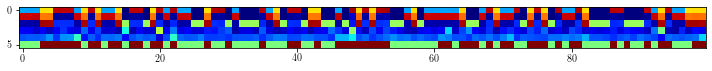

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(train_data_shuffled),                         #numpy array generating the image
           cmap = 'jet',             #color map used to specify colors
           interpolation='nearest'    #algorithm used to blend square colors; with 'nearest' colors will not be blended
          )

plt.tight_layout()

In [72]:
#extract X matrix
X = train_data_shuffled[:,:-1]
print('X:')
pd.DataFrame(X)

X:


,0,1,2,3,4
0,-0.429119,0.869610,-0.927325,-0.762039,-0.590116
1,-0.431400,0.863086,-0.923658,-0.792840,-0.563961
2,-0.426227,0.880835,-0.933175,-0.860194,-0.576465
3,0.340280,0.560051,0.931456,-0.769966,-0.556146
4,0.340719,0.564942,0.929178,-0.885435,-0.458245
...,...,...,...,...,...
95,-0.430791,0.868348,-0.926147,-0.926620,-0.569009
96,-0.429286,0.867110,-0.926161,-0.679927,-0.588937
97,0.342932,0.564080,0.934484,-0.887896,-0.561543
98,0.350718,0.578358,0.930477,-0.738159,-0.534656


In [73]:
#extract y vector 

y = train_data_shuffled[:,-1]
print('y:')
pd.DataFrame(y)

y:


,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
95,0.0
96,0.0
97,0.0
98,1.0


In [0]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

#clf = svm.SVC(gamma=0.001, C=100.)
#clf.fit(X,y)

In [87]:
#let's now do the same process for the test data 

testing_data = data_X(test_data)
print('X : y for testing data')
pd.DataFrame(testing_data)

X : y for testing data


,0,1,2,3,4,5
0,-0.430804,0.863086,-0.923837,-0.728881,-0.539447,0.0
1,0.339557,0.563784,0.927209,-0.818439,-0.605889,0.0
2,0.888264,-0.944071,-0.668631,-0.751788,-0.605011,0.0
3,-0.996989,-0.998307,0.076140,-0.647370,-0.611079,0.0
4,-0.429876,0.867298,-0.925930,-0.773587,-0.459549,0.0
...,...,...,...,...,...,...
95,-0.429849,0.866236,-0.925597,-0.751273,-0.556766,1.0
96,0.344897,0.568306,0.933503,-0.895925,-0.625205,1.0
97,0.896302,-0.935064,-0.673095,-0.851844,-0.572966,1.0
98,0.888122,-0.950066,-0.664741,-0.741957,-0.598255,1.0


In [88]:
testing_data_shuffled = np.take(testing_data,np.random.permutation(testing_data.shape[0]),axis=0,out=testing_data)
print('Shuffled Data:')
pd.DataFrame(testing_data_shuffled)

Shuffled Data:


,0,1,2,3,4,5
0,-0.998703,-0.999125,0.077155,-0.772134,-0.561202,1.0
1,-0.999540,-0.999708,0.077700,-0.865043,-0.590197,0.0
2,-0.998851,-0.999271,0.077277,-0.794474,-0.582710,0.0
3,0.884944,-0.956626,-0.662539,-0.623066,-0.641043,1.0
4,0.343929,0.569343,0.928158,-0.744974,-0.601828,0.0
...,...,...,...,...,...,...
95,-0.427152,0.874589,-0.930200,-0.727168,-0.618634,1.0
96,-0.999535,-0.999679,0.077722,-0.869711,-0.526912,0.0
97,-0.999553,-0.999707,0.077711,-0.868862,-0.565626,0.0
98,-0.429771,0.867367,-0.926103,-0.781230,-0.552591,0.0


In [0]:
y_test = testing_data_shuffled[:,-1]
x_test = testing_data_shuffled[:,:-1]

In [90]:
predicted = clf.predict(x_test)

accuracy_score(y_test, predicted)

0.71

In [91]:
y_test

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.])